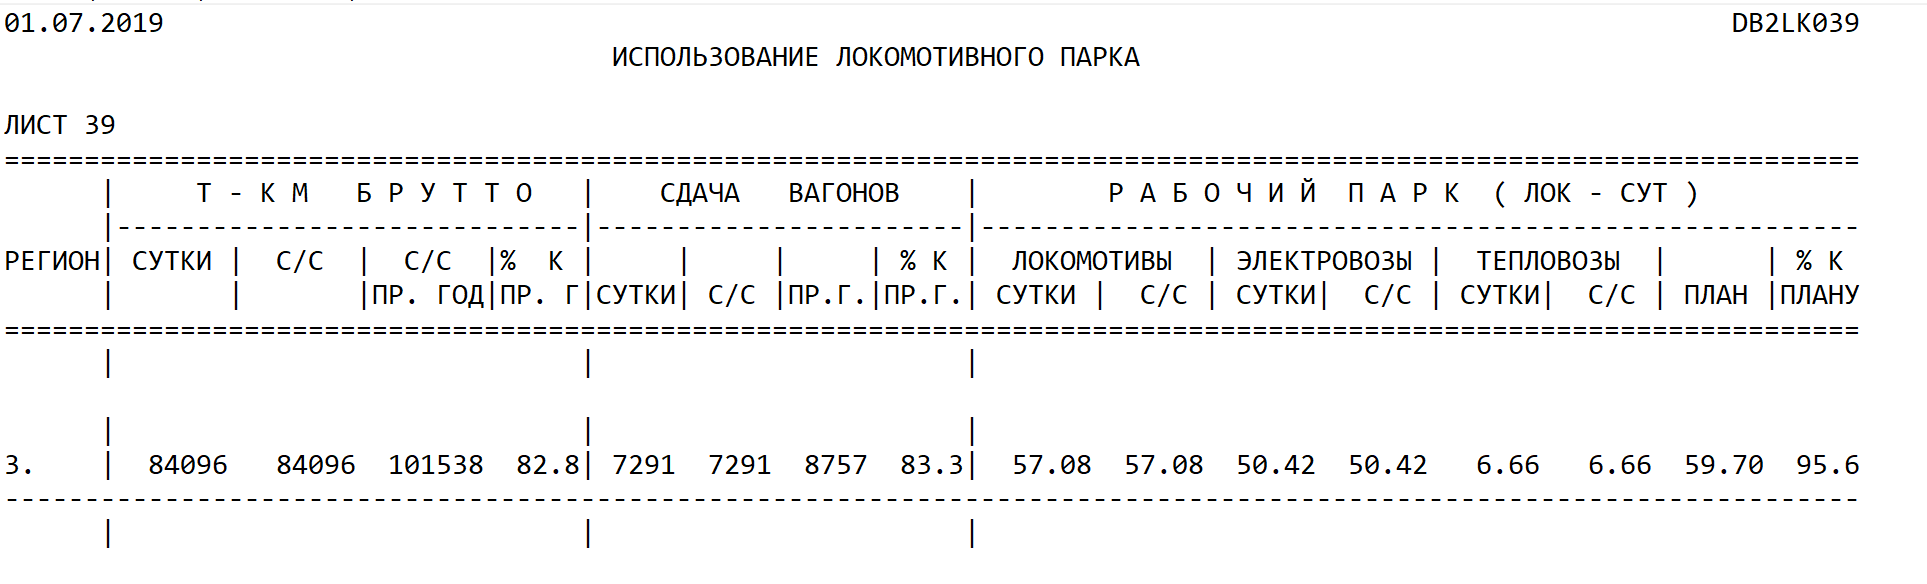

In [1]:
import os
import re
import pandas as pd
import datetime

In [2]:
def znach(s): #делит строку на слова, выбрасывает путсные значения
    ar=re.split('\|| ',s)
    res=[]
    for i in ar:
        if i!='':
            res.append(i)
    return res #возвращает список

def todate(tt): #преобразует строку в дату
    tt=re.split('\.|:|\xa0|-| ', tt)
    if len(tt[2])<4:
        tt[2]='20'+tt[2]
    if len(tt)>3:
        z=datetime.datetime(year=int(tt[2]),month=int(tt[1]),day=int(tt[0]), hour=int(tt[3]), minute=int(tt[4]))
    else:
        z=datetime.date(year=int(tt[2]),month=int(tt[1]),day=int(tt[0]))
    return pd.to_datetime(z) #возвращает pandas.datetime


In [3]:
dr="inFile/"

df_park=pd.DataFrame()
for file in os.listdir(dr):
    if file.endswith(".txt"):
        
        park=[]
        
        d, t, v, pr_f, pr_p = [None for k in range(5)]
        inp = open(os.path.join(dr, file), encoding="windows-1251").read()
        print(os.path.join(dr, file), inp.split('\n')[0])
        d=todate(znach(inp.split('\n')[0])[0])
        s=0
        while s<len(inp.split('\n')):
            if znach(re.split('\n', inp)[s])==[]: 
                s+=1
                continue
            if znach(re.split('\n', inp)[s])[0]=='3.':
                t=znach(re.split('\n', inp)[s])[1]
                v=znach(re.split('\n', inp)[s])[5]
                pr_f=znach(re.split('\n', inp)[s])[9]
                pr_p=znach(re.split('\n', inp)[s])[15]
                park.append([d,t,v,pr_p, pr_f])
                break
            s+=1
            
        df_temp=pd.DataFrame(park, columns=['Дата', 'т-км брутто', 'Сдача вагоны', 'Рабочий парк план', 'Рабочий парк факт'])
        df_park=pd.concat([df_park, df_temp], ignore_index=True)

del df_temp
df_park.head()

inFile/07-05.txt 05.07.2019                                                                                                  DB2LK039
inFile/07-10.txt 10.07.2019                                                                                                  DB2LK039
inFile/07-04.txt 04.07.2019                                                                                                  DB2LK039
inFile/07-07.txt 07.07.2019                                                                                                  DB2LK039
inFile/07-09.txt 09.07.2019                                                                                                  DB2LK039
inFile/07-08.txt 08.07.2019                                                                                                  DB2LK039
inFile/07-03.txt 03.07.2019                                                                                                  DB2LK039
inFile/07-01.txt 01.07.2019                                   

,Дата,т-км брутто,Сдача вагоны,Рабочий парк план,Рабочий парк факт
0,2019-07-05,87024,7718,59.70,69.60
1,2019-07-10,92524,7810,59.70,64.28
2,2019-07-04,100940,7948,59.70,72.25
3,2019-07-07,100695,8305,59.70,68.93
4,2019-07-09,83002,7950,59.70,66.29
